# Production-diffusion-degradation

In [1]:
import numpy as np
import matplotlib.patches as patches
from tqdm import tqdm # library to visualize the progress status of a python loop
from euler_scheme_1d_with_growth.diffusion_equation import *
from euler_scheme_1d_with_growth.matplotlib_defaults import *

In [2]:
D     = 1.0  # Diffusion coefficient
beta  = 1.0  # Degradation rate
alpha = 1.0  # Production rate

w     = 0.5  # width of production region

x0    = 0.5  # starting position width of production region
Lmax = 4    # system size boundaries are at the positions 0 and +Lmax

In [3]:
# parameters for Euler scheme

tmax = 5    # time till what to calculate solution

dt   = 1e-5 # time step
dx   = 1e-2 # spatial step

In [4]:
# arrays for space and time coordinates

t   = np.linspace(0, tmax, int(tmax/dt)+1)
ndt = len(t)

**Stability of numerical scheme**

explained in `diffusion_equation/1_solving_diffusion_equation.ipynb`

In [5]:
if D*dt/dx**2 < 0.5:
    print(f'the Courant condition is fullfilled, D*dt/dx**2 = {np.round(D*dt/dx**2, 2)}')
else:
    print(f'the Courant condition is NOT fullfilled, please, revise parameters for Euler scheme')
    print(f'D*dt/dx**2 = {np.round(D*dt/dx**2, 2)}')

the Courant condition is fullfilled, D*dt/dx**2 = 0.1


In [6]:
x, ct_only_prod  = euler_scheme(dx, Lmax, dt, ndt, 0, 0, alpha, w, x0, boundary='reflect')

100%|███████████████████████████████████████████████████████████████████████| 499999/499999 [00:28<00:00, 17264.86it/s]


In [7]:
x, ct_only_diff  = euler_scheme(dx, Lmax, dt, ndt, D, 0, alpha, w, x0, boundary='reflect')

100%|███████████████████████████████████████████████████████████████████████| 499999/499999 [00:30<00:00, 16431.47it/s]


In [8]:
x, ct  = euler_scheme(dx, Lmax, dt, ndt, D, beta, alpha, w, x0, boundary='reflect')

100%|███████████████████████████████████████████████████████████████████████| 499999/499999 [00:29<00:00, 16940.34it/s]


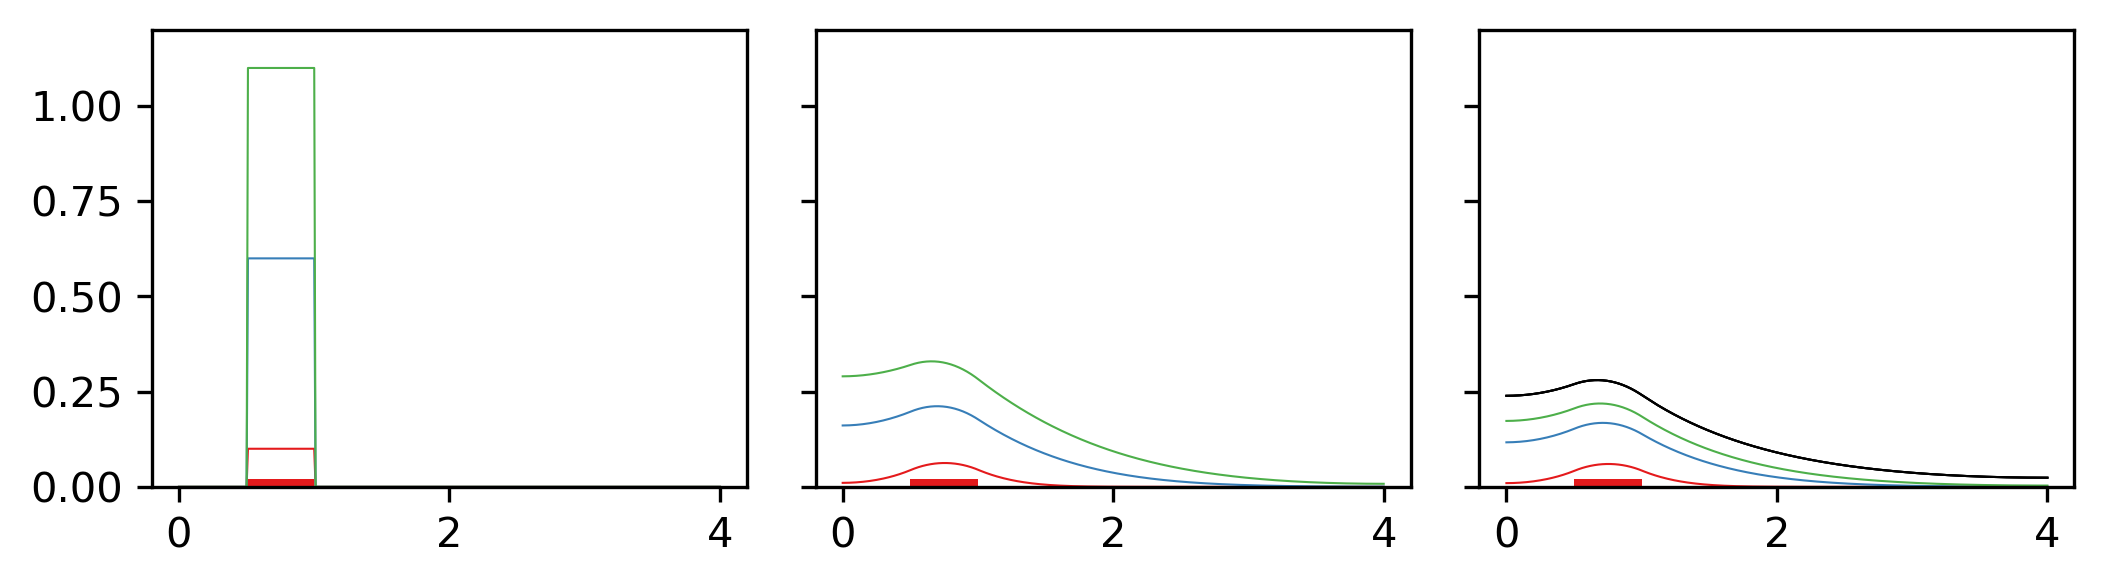

In [9]:
t_to_plot = [0.1, 0.6, 1.1]
nrows, ncols = 1, len( t_to_plot )
colors = plt.cm.Set1.colors

fig, ax = plt.subplots(nrows, ncols, figsize=(default_figsize["large"][0], default_figsize["large"][1]/4), sharex=True, sharey=True, dpi=300)

i = 0
for j, it in enumerate( t_to_plot ): 
    ax[i].plot(x, ct_only_prod[ int(it/dt) ], color=colors[j], label=f't={t}')
    ax[i].add_patch(
             patches.Rectangle((x0, 0), w, 0.02, edgecolor=None, facecolor=colors[0])
        )
    ax[i].set_ylim(0, 1.2)
    
i = 1
for j, it in enumerate( t_to_plot ): 
    ax[i].plot(x, ct_only_diff[ int(it/dt) ], color=colors[j], label=f't={t}')
    ax[i].add_patch(
             patches.Rectangle((x0, 0), w, 0.02, edgecolor=None, facecolor=colors[0])
        )
    ax[i].set_ylim(0, 1.2)

i = 2
for j, it in enumerate( t_to_plot ): 
    ax[i].plot(x, ct[ int(it/dt) ], color=colors[j], label=f't={t}')
    ax[i].add_patch(
             patches.Rectangle((x0, 0), w, 0.02, edgecolor=None, facecolor=colors[0])
        )
    ax[i].plot( x, steady_solution(x, x0, (D/beta)**0.5, alpha, w, beta, D, Lmax), color='black', label='Steady state')
    ax[i].set_ylim(0, 1.2)
    
plt.tight_layout()
plt.savefig('fig/production_diffusion_degradation.pdf')
plt.show()